<a href="https://colab.research.google.com/github/sheunq/Web-scraping-British-Airway/blob/main/british_airway_webscraping_with_beautifulsoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

image_path=os.path.join('.','images','all_image')
os.makedirs(image_path,exist_ok=True)

def savefig(fig_id,tight_layout=True,resolution=300,fig_extension='png'):
    path=os.path.join(image_path,fig_id+'.'+fig_extension)
    print(f'saving figure {fig_id}')
    if tight_layout:
        plt.tight_layout()

    plt.savefig(path,format=fig_extension,dpi=resolution)

from IPython.display import display
sns.set()

## Route



In [2]:
Route=[]
for i in range(1,100):
    url=f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/"
    doc=requests.get(url).text
    result=BeautifulSoup(doc,'lxml')
    for i in range(0,len(result.find_all('td',class_='review-value'))):
        rv=result.find_all('td',class_='review-value')[i].string
        if (re.findall('to',rv)==['to']):
            Route1=(result.find_all('td',class_='review-value')[i].string)
            Route.append(Route1)

## Seat Type

In [3]:
Seat_Type=[]
for i in range(1,100):
    url=f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/"
    doc=requests.get(url).text
    result=BeautifulSoup(doc,'lxml')
    for i in range(0,len(result.find_all('td',class_='review-value'))):
        rv=result.find_all('td',class_='review-value')[i].string
        if (re.findall('Class$',rv)==['Class'])|(re.findall('Premium Economy',rv)==['Premium Economy']):
            Seat_Type1=(result.find_all('td',class_='review-value')[i].string)
            Seat_Type.append(Seat_Type1)

## Date Flown

In [4]:
Date_Flown=[]
for i in range(1,100):
    url=f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/"
    doc=requests.get(url).text
    result=BeautifulSoup(doc,'lxml')
    for i in range(0,len(result.find_all('td',class_='review-value'))):
        rv=result.find_all('td',class_='review-value')[i].string
        if (re.findall('^January',rv)==['January'])|(re.findall('^Febuary',rv)==['Febuary'])|(re.findall('^March',rv)==['March'])|(re.findall('^April',rv)==['April'])|(re.findall('^May',rv)==['May'])|(re.findall('^June',rv)==['June'])|(re.findall('^July',rv)==['July'])|(re.findall('^August',rv)==['August'])|(re.findall('^September',rv)==['September'])|(re.findall('^October',rv)==['October'])|(re.findall('^November',rv)==['November'])|(re.findall('^December',rv)==['December']):
            Date_Flown1=(result.find_all('td',class_='review-value')[i].string)
            Date_Flown.append(Date_Flown1)


## Recommended

In [5]:
Recommended=[]
for i in range(1,100):
    url=f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/"
    doc=requests.get(url).text
    result=BeautifulSoup(doc,'lxml')
    for i in range(0,len(result.find_all('td',class_='review-value'))):
        rv=result.find_all('td',class_='review-value')[i].string
        if (rv=='yes')|(rv=='no'):
            Recommended1=(result.find_all('td',class_='review-value')[i].string)
            Recommended.append(Recommended1)

## Aircraft

In [6]:
aircraft=[]
for i in range(1,100):
    url=f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/"
    doc=requests.get(url).text
    result=BeautifulSoup(doc,'lxml')
    for i in range(0,len(result.find_all('td',class_='review-value'))):
        rv=result.find_all('td',class_='review-value')[i].string
        if (re.findall('^A3',rv)==['A3'])|(re.findall('^Boeing',rv)==['Boeing']):
            #print(result.find_all('td',class_='review-value')[i].string)
            air=(result.find_all('td',class_='review-value')[i].string)
            aircraft.append(air)

In [7]:
rating=[]

for i in range(1,100):
    url=f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/"
    doc=requests.get(url).text
    result=BeautifulSoup(doc,'lxml')
    for i in range(0,len(result.div.find_all('time',itemprop="datePublished"))):
            date=result.div.find_all('time',itemprop="datePublished")[i].string
            name=result.div.find_all('span',itemprop="name")[i].string
            country=result.div.find_all('h3')[i].get_text(strip=True)
            comment=result.div.find_all('h2')[i+1].string
            
            rv=result.find_all('td',class_='review-value')[i].string
            if (re.findall('Leisure$',rv)==['Leisure'])|(re.findall('Business',rv)==['Business']):
                Type_Of_Traveller=(result.find_all('td',class_='review-value')[i].string)
            
            rating.append([date,name,country,comment,Type_Of_Traveller])

In [8]:
Cabin_Staff_Service=[0.2,0.2,0.2,0.2,0.2]
Food_and_Beverages=[0.3,0.3,0.1,0.1,0.2]
Ground_Service=[0.2,0.3,0.2,0.1,0.2]
Inflight_Entertainment=[0.1,0.2,0.3,0.3,0.1]
Seat_comfort=[0.2,0.1,0.4,0.2,0.1]
Value_For_Money=[0.1,0.3,0.2,0.1,0.3]
Wifi_and_Connectivity=[0.3,0.1,0.1,0.2,0.3]


star=[1,2,3,4,5]

Cabin_Staff_Service_rating=np.random.choice(star,len(rating),p=Cabin_Staff_Service)
Food_and_Beverages_rating=np.random.choice(star,len(rating),p=Food_and_Beverages)
Ground_Service_rating=np.random.choice(star,len(rating),p=Ground_Service)
Inflight_Entertainment=np.random.choice(star,len(rating),p=Inflight_Entertainment)
Seat_comfort_rating=np.random.choice(star,len(rating),p=Seat_comfort)
Value_For_Money_rating=np.random.choice(star,len(rating),p=Value_For_Money)
Wifi_and_Connectivity_rating=np.random.choice(star,len(rating),p=Wifi_and_Connectivity)

In [9]:
def rand(x):
    return np.random.choice(a=x,size=len(rating),p=(np.ones(len(x))/len(x)))

In [10]:
British_Airway=pd.DataFrame(rating,columns=['date','name','country','comment','Type_Of_Traveller'])
#British_Airway['Route']=rand(Route)
British_Airway['Seat_Type']=rand(Seat_Type)
#British_Airway['Date_Flown']=rand(Date_Flown)
British_Airway['Recommended']=rand(Recommended)
British_Airway['Cabin_Staff_Service_rating']=Cabin_Staff_Service_rating
British_Airway['Food_and_Beverages_rating']=Food_and_Beverages_rating
British_Airway['Ground_Service_rating']=Ground_Service_rating
British_Airway['Inflight_Entertainment']=Inflight_Entertainment
British_Airway['Seat_comfort_rating']=Seat_comfort_rating
British_Airway['Value_For_Money_rating']=Value_For_Money_rating
British_Airway['Wifi_and_Connectivity_rating']=Wifi_and_Connectivity_rating

In [11]:
British_Airway.head()

,date,name,country,comment,Type_Of_Traveller,Seat_Type,Recommended,Cabin_Staff_Service_rating,Food_and_Beverages_rating,Ground_Service_rating,Inflight_Entertainment,Seat_comfort_rating,Value_For_Money_rating,Wifi_and_Connectivity_rating
0,21st March 2023,Mohammed Laidi,Mohammed Laidi(United Kingdom)21st March 2023,"""made a complaint, nothing happened""",Family Leisure,First Class,no,1,2,2,4,2,5,4
1,21st March 2023,S Walder,S Walder(Austria)21st March 2023,"""Every flight was delayed""",Family Leisure,Business Class,no,1,4,2,4,2,5,5
2,20th March 2023,L Garson,L Garson(United States)20th March 2023,"""how far the quality level has slid""",Family Leisure,Economy Class,yes,2,1,5,3,3,2,1
3,20th March 2023,J Billot,J Billot(France)20th March 2023,"""worst cabin experience ever""",Family Leisure,Business Class,no,3,2,1,4,1,2,2
4,18th March 2023,l Higgs,l Higgs(India)18th March 2023,"""Very impressive and efficient""",Family Leisure,Business Class,yes,1,4,1,1,4,2,1


## Data Cleaning

In [12]:
ba1=British_Airway['country'].str.split(')',n=1,expand=True)
British_Airway['country']=ba1[0].str.split('(',n=1,expand=True)[1]
British_Airway.head()


,date,name,country,comment,Type_Of_Traveller,Seat_Type,Recommended,Cabin_Staff_Service_rating,Food_and_Beverages_rating,Ground_Service_rating,Inflight_Entertainment,Seat_comfort_rating,Value_For_Money_rating,Wifi_and_Connectivity_rating
0,21st March 2023,Mohammed Laidi,United Kingdom,"""made a complaint, nothing happened""",Family Leisure,First Class,no,1,2,2,4,2,5,4
1,21st March 2023,S Walder,Austria,"""Every flight was delayed""",Family Leisure,Business Class,no,1,4,2,4,2,5,5
2,20th March 2023,L Garson,United States,"""how far the quality level has slid""",Family Leisure,Economy Class,yes,2,1,5,3,3,2,1
3,20th March 2023,J Billot,France,"""worst cabin experience ever""",Family Leisure,Business Class,no,3,2,1,4,1,2,2
4,18th March 2023,l Higgs,India,"""Very impressive and efficient""",Family Leisure,Business Class,yes,1,4,1,1,4,2,1


In [13]:
British_Airway['comment']=British_Airway['comment'].str.replace('"','')

In [14]:
British_Airway.head()

,date,name,country,comment,Type_Of_Traveller,Seat_Type,Recommended,Cabin_Staff_Service_rating,Food_and_Beverages_rating,Ground_Service_rating,Inflight_Entertainment,Seat_comfort_rating,Value_For_Money_rating,Wifi_and_Connectivity_rating
0,21st March 2023,Mohammed Laidi,United Kingdom,"made a complaint, nothing happened",Family Leisure,First Class,no,1,2,2,4,2,5,4
1,21st March 2023,S Walder,Austria,Every flight was delayed,Family Leisure,Business Class,no,1,4,2,4,2,5,5
2,20th March 2023,L Garson,United States,how far the quality level has slid,Family Leisure,Economy Class,yes,2,1,5,3,3,2,1
3,20th March 2023,J Billot,France,worst cabin experience ever,Family Leisure,Business Class,no,3,2,1,4,1,2,2
4,18th March 2023,l Higgs,India,Very impressive and efficient,Family Leisure,Business Class,yes,1,4,1,1,4,2,1


In [15]:
British_Airway['date']=British_Airway['date'].astype('str')

In [16]:
British_Airway.to_csv('British_Airway.csv',index=False)

In [18]:
British_Airway=pd.read_csv('/content/British_Airway.csv',
        parse_dates=["date"])
#British_Airway['date']=pd.to_datetime(British_Airway['date'])
British_Airway.head()

,date,name,country,comment,Type_Of_Traveller,Seat_Type,Recommended,Cabin_Staff_Service_rating,Food_and_Beverages_rating,Ground_Service_rating,Inflight_Entertainment,Seat_comfort_rating,Value_For_Money_rating,Wifi_and_Connectivity_rating
0,2023-03-21,Mohammed Laidi,United Kingdom,"made a complaint, nothing happened",Family Leisure,First Class,no,1,2,2,4,2,5,4
1,2023-03-21,S Walder,Austria,Every flight was delayed,Family Leisure,Business Class,no,1,4,2,4,2,5,5
2,2023-03-20,L Garson,United States,how far the quality level has slid,Family Leisure,Economy Class,yes,2,1,5,3,3,2,1
3,2023-03-20,J Billot,France,worst cabin experience ever,Family Leisure,Business Class,no,3,2,1,4,1,2,2
4,2023-03-18,l Higgs,India,Very impressive and efficient,Family Leisure,Business Class,yes,1,4,1,1,4,2,1


In [19]:
groupby_country=British_Airway.groupby('country')[['Cabin_Staff_Service_rating',
       'Food_and_Beverages_rating', 'Ground_Service_rating',
       'Inflight_Entertainment', 'Seat_comfort_rating',
       'Value_For_Money_rating', 'Wifi_and_Connectivity_rating']].mean()
groupby_country

,Cabin_Staff_Service_rating,Food_and_Beverages_rating,Ground_Service_rating,Inflight_Entertainment,Seat_comfort_rating,Value_For_Money_rating,Wifi_and_Connectivity_rating
country,,,,,,,
Argentina,2.666667,4.000000,2.666667,3.000000,2.666667,3.333333,2.666667
Australia,3.029412,2.823529,2.441176,3.029412,3.000000,2.941176,3.029412
Austria,2.000000,2.500000,2.500000,2.500000,1.500000,4.000000,5.000000
Belgium,2.600000,3.400000,2.600000,3.000000,2.200000,3.200000,3.600000
Bermuda,4.000000,1.000000,1.000000,3.000000,2.000000,5.000000,4.000000
Botswana,4.000000,1.000000,5.000000,3.000000,4.000000,5.000000,2.000000
Brazil,4.000000,1.000000,4.000000,3.000000,2.000000,3.500000,4.500000
Bulgaria,4.000000,2.000000,5.000000,5.000000,2.000000,1.000000,4.000000
Canada,2.968750,2.562500,2.843750,3.406250,2.781250,3.000000,3.312500


In [20]:
def rating_by_country(v,c,title):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=v.index,y=v)
    plt.xticks(rotation=90)
    plt.title(f'{title}')
    savefig(f'{c}.png')
    plt.show()

saving figure Cabin_Staff_Service_rating_by_country.png


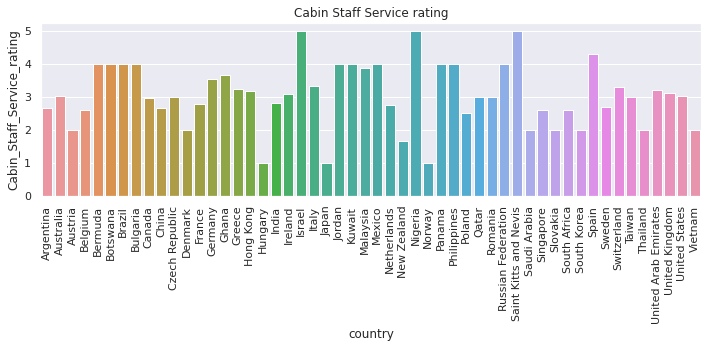

None

saving figure Food_and_Beverages_rating_by_country.png


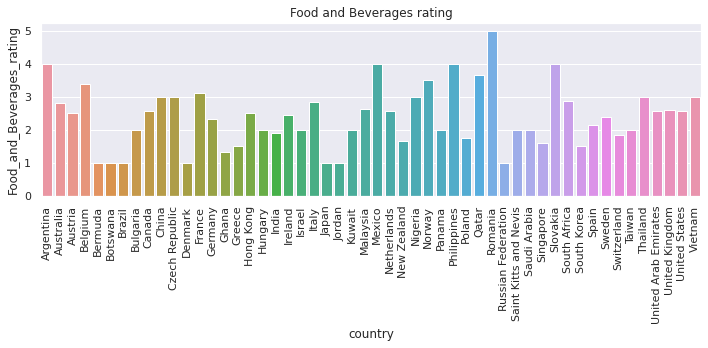

None

saving figure Ground_Service_rating_by_country.png


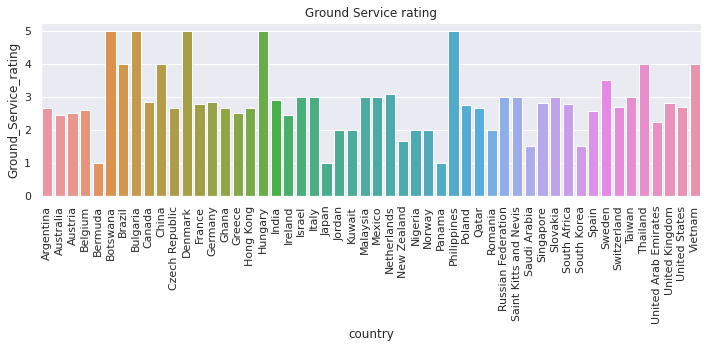

None

saving figure Inflight_Entertainment_by_country.png


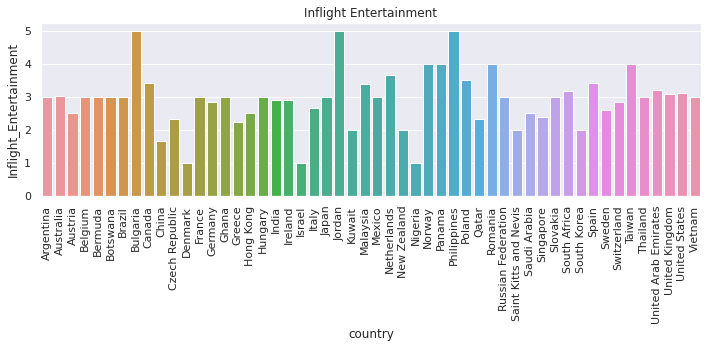

None

saving figure Seat_comfort_rating_by_country.png


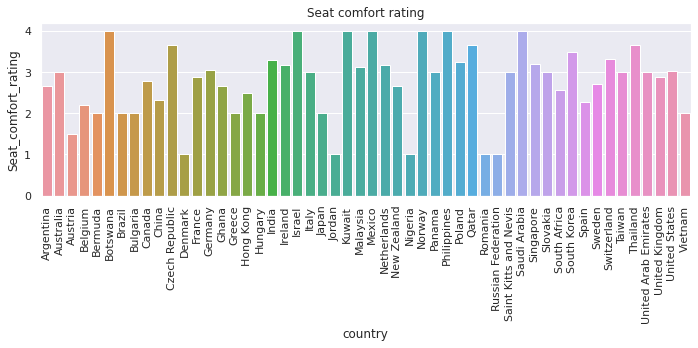

None

saving figure Value_For_Money_rating_by_country.png


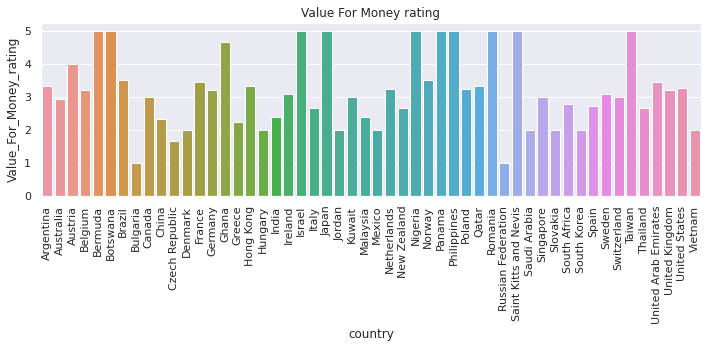

None

saving figure Wifi_and_Connectivity_rating_by_country.png


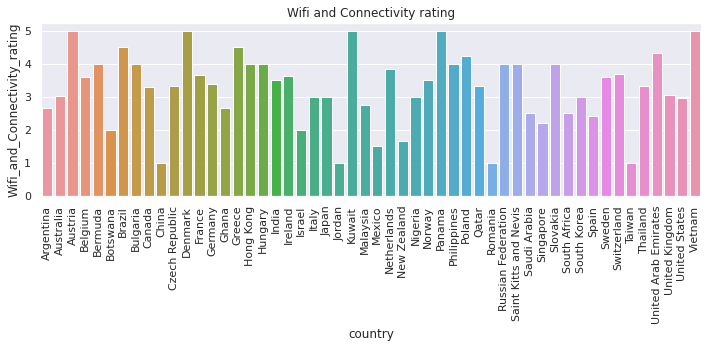

None

In [29]:
# Cabin Staff Service rating
display(rating_by_country(groupby_country['Cabin_Staff_Service_rating'],'Cabin_Staff_Service_rating_by_country','Cabin Staff Service rating'))
display(rating_by_country(groupby_country['Food_and_Beverages_rating'],'Food_and_Beverages_rating_by_country','Food and Beverages rating'))
display(rating_by_country(groupby_country['Ground_Service_rating'],'Ground_Service_rating_by_country','Ground Service rating'))
display(rating_by_country(groupby_country['Inflight_Entertainment'],'Inflight_Entertainment_by_country','Inflight Entertainment'))
display(rating_by_country(groupby_country['Seat_comfort_rating'],'Seat_comfort_rating_by_country','Seat comfort rating'))
display(rating_by_country(groupby_country['Value_For_Money_rating'],'Value_For_Money_rating_by_country','Value For Money rating'))
display(rating_by_country(groupby_country['Wifi_and_Connectivity_rating'],'Wifi_and_Connectivity_rating_by_country','Wifi and Connectivity rating'))

In [22]:
groupby_Type_Of_Traveller=British_Airway.groupby('Type_Of_Traveller')[['Cabin_Staff_Service_rating',
       'Food_and_Beverages_rating', 'Ground_Service_rating',
       'Inflight_Entertainment', 'Seat_comfort_rating',
       'Value_For_Money_rating', 'Wifi_and_Connectivity_rating']].sum()
groupby_Type_Of_Traveller

,Cabin_Staff_Service_rating,Food_and_Beverages_rating,Ground_Service_rating,Inflight_Entertainment,Seat_comfort_rating,Value_For_Money_rating,Wifi_and_Connectivity_rating
Type_Of_Traveller,,,,,,,
Business,424,333,387,418,386,419,413
Business Class,776,670,706,781,741,804,834
Couple Leisure,624,531,555,602,587,647,591
Family Leisure,453,393,413,441,438,481,477
Solo Leisure,764,617,701,791,727,789,756


In [23]:
def rating_by_type_of_traveller(v,c,title):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=v.index,y=v)
    #plt.xticks(rotation=90)
    plt.title(f'{title}')
    savefig(f'{c}.png')
    plt.show()

saving figure Cabin_Staff_Service_rating_by_type_of_traveller.png


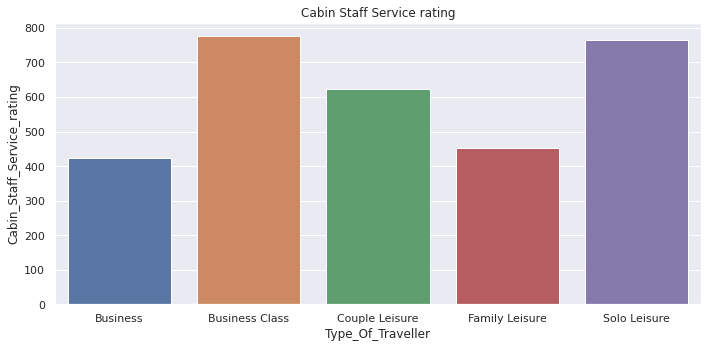

None

saving figure Food_and_Beverages_rating_by_type_of_traveller.png


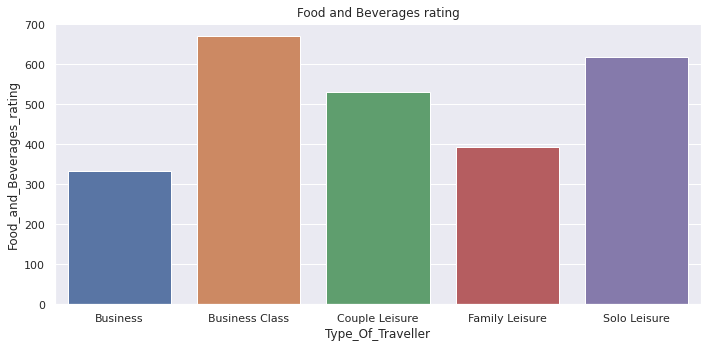

None

saving figure Ground_Service_rating_by_type_of_traveller.png


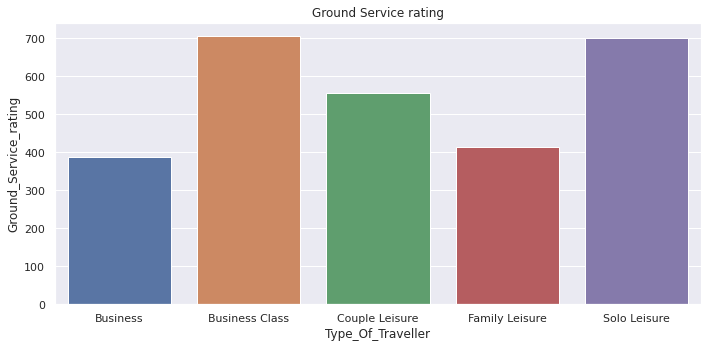

None

saving figure Inflight_Entertainment_by_type_of_traveller.png


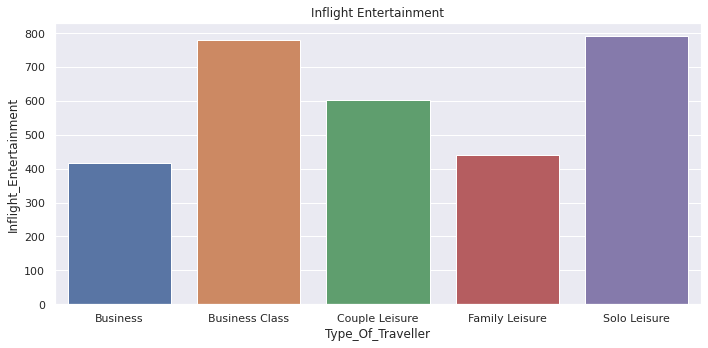

None

saving figure Seat_comfort_rating_by_type_of_traveller.png


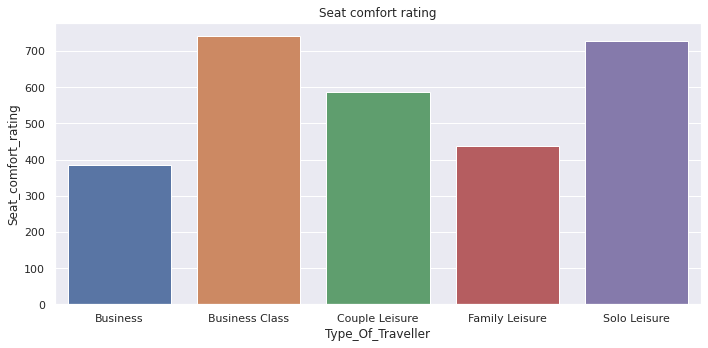

None

saving figure Value_For_Money_rating_by_type_of_traveller.png


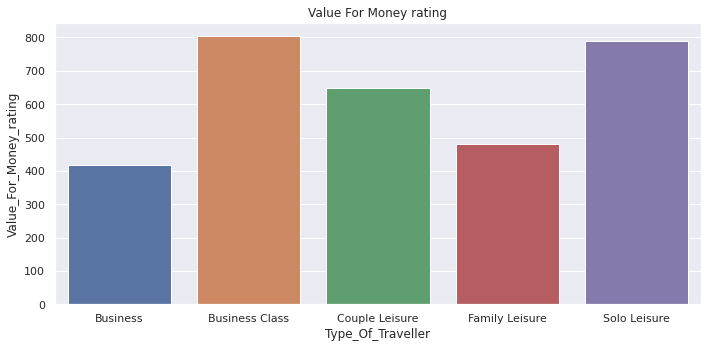

None

saving figure Wifi_and_Connectivity_rating_by_type_of_traveller.png


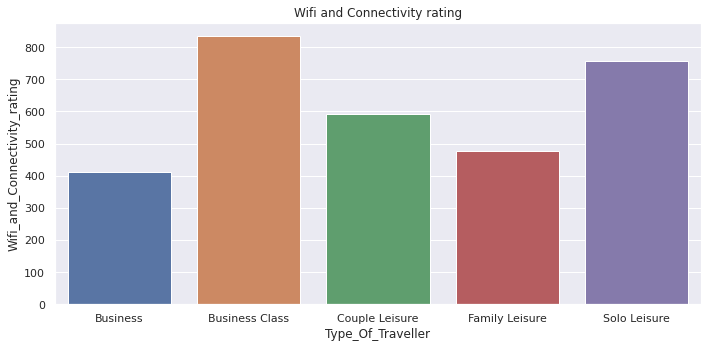

None

In [30]:
# Cabin Staff Service rating
display(rating_by_type_of_traveller(groupby_Type_Of_Traveller['Cabin_Staff_Service_rating'],'Cabin_Staff_Service_rating_by_type_of_traveller','Cabin Staff Service rating'))
display(rating_by_type_of_traveller(groupby_Type_Of_Traveller['Food_and_Beverages_rating'],'Food_and_Beverages_rating_by_type_of_traveller','Food and Beverages rating'))
display(rating_by_type_of_traveller(groupby_Type_Of_Traveller['Ground_Service_rating'],'Ground_Service_rating_by_type_of_traveller','Ground Service rating'))
display(rating_by_type_of_traveller(groupby_Type_Of_Traveller['Inflight_Entertainment'],'Inflight_Entertainment_by_type_of_traveller','Inflight Entertainment'))
display(rating_by_type_of_traveller(groupby_Type_Of_Traveller['Seat_comfort_rating'],'Seat_comfort_rating_by_type_of_traveller','Seat comfort rating'))
display(rating_by_type_of_traveller(groupby_Type_Of_Traveller['Value_For_Money_rating'],'Value_For_Money_rating_by_type_of_traveller','Value For Money rating'))
display(rating_by_type_of_traveller(groupby_Type_Of_Traveller['Wifi_and_Connectivity_rating'],'Wifi_and_Connectivity_rating_by_type_of_traveller','Wifi and Connectivity rating'))

In [25]:
British_Airway.head()

,date,name,country,comment,Type_Of_Traveller,Seat_Type,Recommended,Cabin_Staff_Service_rating,Food_and_Beverages_rating,Ground_Service_rating,Inflight_Entertainment,Seat_comfort_rating,Value_For_Money_rating,Wifi_and_Connectivity_rating
0,2023-03-21,Mohammed Laidi,United Kingdom,"made a complaint, nothing happened",Family Leisure,First Class,no,1,2,2,4,2,5,4
1,2023-03-21,S Walder,Austria,Every flight was delayed,Family Leisure,Business Class,no,1,4,2,4,2,5,5
2,2023-03-20,L Garson,United States,how far the quality level has slid,Family Leisure,Economy Class,yes,2,1,5,3,3,2,1
3,2023-03-20,J Billot,France,worst cabin experience ever,Family Leisure,Business Class,no,3,2,1,4,1,2,2
4,2023-03-18,l Higgs,India,Very impressive and efficient,Family Leisure,Business Class,yes,1,4,1,1,4,2,1


In [26]:
groupby_Seat_Type=British_Airway.groupby('Seat_Type')[['Cabin_Staff_Service_rating',
       'Food_and_Beverages_rating', 'Ground_Service_rating',
       'Inflight_Entertainment', 'Seat_comfort_rating',
       'Value_For_Money_rating', 'Wifi_and_Connectivity_rating']].mean()
groupby_Seat_Type

,Cabin_Staff_Service_rating,Food_and_Beverages_rating,Ground_Service_rating,Inflight_Entertainment,Seat_comfort_rating,Value_For_Money_rating,Wifi_and_Connectivity_rating
Seat_Type,,,,,,,
Business Class,3.132653,2.534014,2.816327,3.095238,2.962585,3.176871,3.102041
Economy Class,3.094891,2.545620,2.810219,3.047445,2.844891,3.177007,3.098540
First Class,2.804878,2.609756,2.414634,3.024390,3.048780,3.170732,2.439024
Premium Economy,2.887850,2.775701,2.757009,3.074766,3.028037,3.130841,3.373832


In [27]:
def rating_by_Seat_Type(v,c,title):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=v.index,y=v)
    #plt.xticks(rotation=90)
    plt.title(f'{title}')
    savefig(f'{c}.png')
    plt.show()

saving figure Cabin_Staff_Service_rating_by_Seat_Type.png


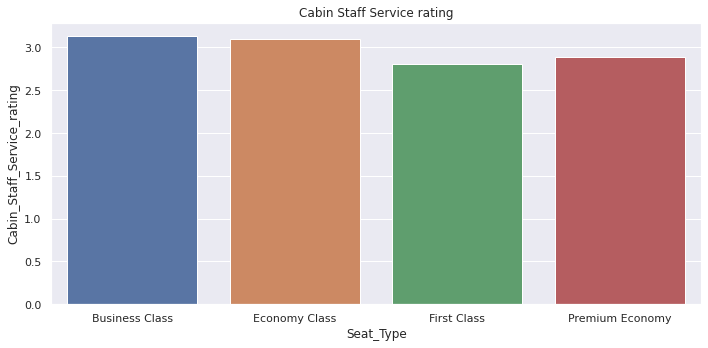

None

saving figure Food_and_Beverages_rating_by_Seat_Type.png


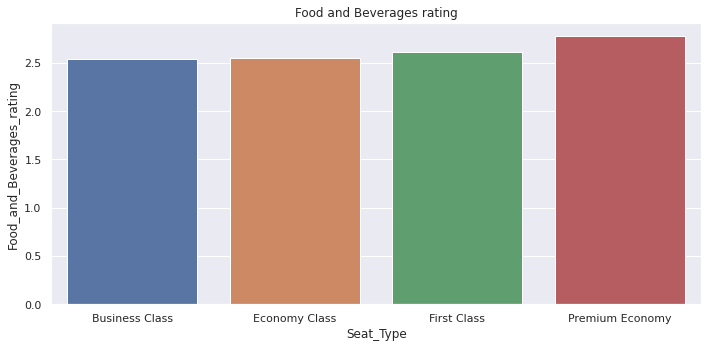

None

saving figure Ground_Service_rating_by_Seat_Type.png


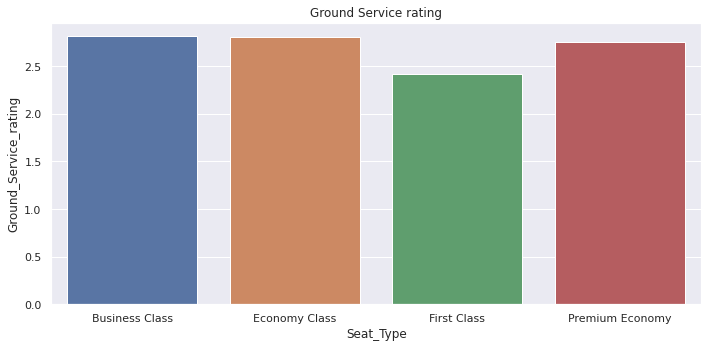

None

saving figure Inflight_Entertainment_by_Seat_Type.png


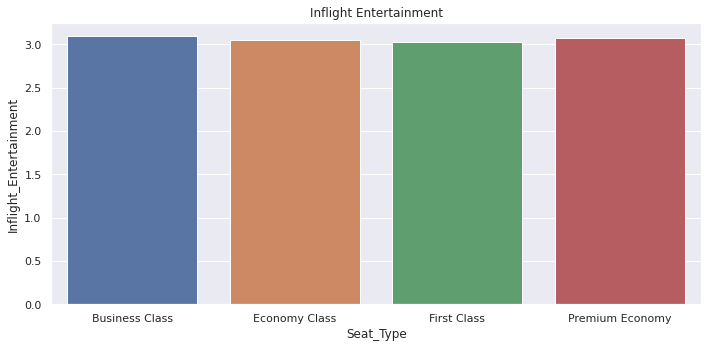

None

saving figure Seat_comfort_rating_by_Seat_Type.png


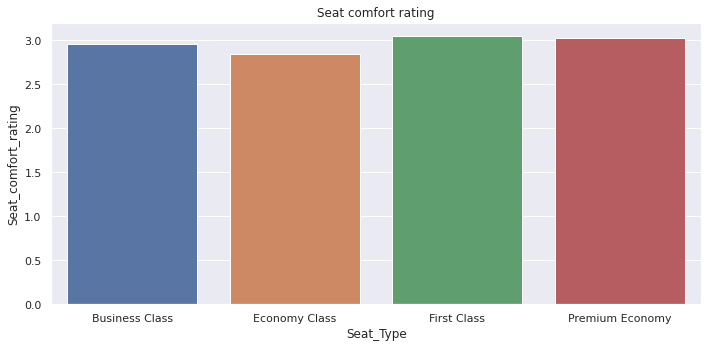

None

saving figure Value_For_Money_rating_by_Seat_Type.png


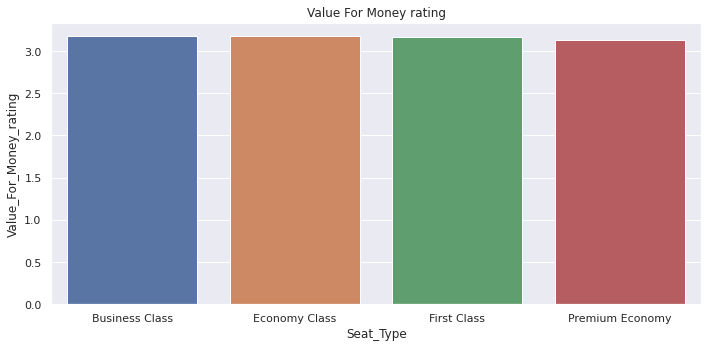

None

saving figure Wifi_and_Connectivity_rating_by_Seat_Type.png


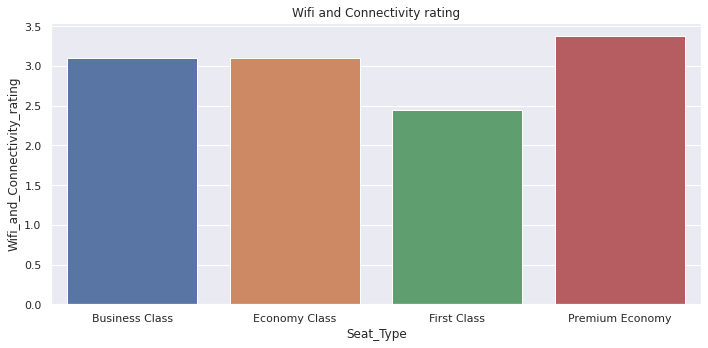

None

In [31]:
# Cabin Staff Service rating
display(rating_by_Seat_Type(groupby_Seat_Type['Cabin_Staff_Service_rating'],'Cabin_Staff_Service_rating_by_Seat_Type','Cabin Staff Service rating'))
display(rating_by_Seat_Type(groupby_Seat_Type['Food_and_Beverages_rating'],'Food_and_Beverages_rating_by_Seat_Type','Food and Beverages rating'))
display(rating_by_Seat_Type(groupby_Seat_Type['Ground_Service_rating'],'Ground_Service_rating_by_Seat_Type','Ground Service rating'))
display(rating_by_Seat_Type(groupby_Seat_Type['Inflight_Entertainment'],'Inflight_Entertainment_by_Seat_Type','Inflight Entertainment'))
display(rating_by_Seat_Type(groupby_Seat_Type['Seat_comfort_rating'],'Seat_comfort_rating_by_Seat_Type','Seat comfort rating'))
display(rating_by_Seat_Type(groupby_Seat_Type['Value_For_Money_rating'],'Value_For_Money_rating_by_Seat_Type','Value For Money rating'))
display(rating_by_Seat_Type(groupby_Seat_Type['Wifi_and_Connectivity_rating'],'Wifi_and_Connectivity_rating_by_Seat_Type','Wifi and Connectivity rating'))